In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [2]:
font_files = font_manager.findSystemFonts()
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
base_dir = './KFS002501'
forest_leisure_info = '산림여가 활동 정보.xlsx'

In [4]:
forest_leisure_info_df = pd.read_excel(os.path.join(base_dir, forest_leisure_info))
forest_leisure_info_df.head()

,메타테이블ID,메타테이블명(논리명),메타_영문명,메타_데이터타입,테이터길이,컬럼명변환(논리명),PK여부,NULL여부
0,TB_KFS_FFNSR_AGGRP_C,산림여가활동 실태조사 연령대 코드,AGGRP_CD,INT,2,연령대코드,True,False
1,TB_KFS_FFNSR_AGGRP_C,산림여가활동 실태조사 연령대 코드,AGGRP_NM,VARCHAR,15,연령대명칭,False,False
2,TB_KFS_FFNSR_AR_C,산림여가활동 실태조사 지역 코드,RSDNC_ARCD,INT,2,거주지역코드,True,False
3,TB_KFS_FFNSR_AR_C,산림여가활동 실태조사 지역 코드,RSDNC_ARA_NM,VARCHAR,15,거주지역명,False,False
4,TB_KFS_FFNSR_RSPT_M,산림여가활동 실태조사 응답자,FFNSR_RSPT_CONNO,BIGINT,20,실태조사응답자일련번호,True,False


In [5]:
# aggrp_c = './KFS002501/TB_KFS_FFNSR_AGGRP_C.csv'
# aggrp_c_df = pd.read_csv(aggrp_c, encoding='cp949')
# aggrp_c_df.head()

In [6]:
# ar_c = './KFS002501/TB_KFS_FFNSR_AR_C.csv'
# ar_c_df = pd.read_csv(ar_c, encoding='cp949')
# ar_c_df.head()

In [7]:
rspt_dst_d = './KFS002501/TB_KFS_FFNSR_RSPT_DST_D.csv'
rspt_dst_d_df = pd.read_csv(rspt_dst_d, encoding='cp949')
rspt_dst_d_df.head()

,답항코드,문항번호코드,답항설명
0,ANSRITM_CD,QSITM_NO_CD,ANSRITM_DSCRT
1,1,Q1-1,거의 매일
2,2,Q1-1,주 3~4회
3,3,Q1-1,주 1~2회
4,4,Q1-1,월 1~2회


In [8]:
# rspt_m = './KFS002501/TB_KFS_FFNSR_RSPT_M.csv'
# rspt_m_df = pd.read_csv(rspt_m, encoding='cp949')
# rspt_m_df.head()

In [9]:
# rspt_qst_c = './KFS002501/TB_KFS_FFNSR_RSPT_QST_C.csv'
# rspt_qst_c_df = pd.read_csv(rspt_qst_c, encoding='cp949')
# rspt_qst_c_df.head()

In [10]:
ans_l1 = './KFS002501/TB_KFS_FFNSR_RSPT_ANS_L1.xlsx'
ans_l1_df = pd.read_excel(ans_l1)
ans_l1_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명
0,FFNSR_RSPT_CONNO,QSITM_NO_CD,ANSRITM_CD,ANSRITM_ADDTN_DSCRT
1,126,Q1-1,4,NaN
2,126,Q1-2,1,NaN
3,126,Q1-3,4,NaN
4,126,Q1-4,1,1


In [11]:
ans_l2 = './KFS002501/TB_KFS_FFNSR_RSPT_ANS_L2.xlsx'
ans_l2_df = pd.read_excel(ans_l2)
ans_l2_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명
0,FFNSR_RSPT_CONNO,QSITM_NO_CD,ANSRITM_CD,ANSRITM_ADDTN_DSCRT
1,6000,Q1-1,4,NaN
2,6000,Q1-2,1,NaN
3,6000,Q1-3,2,NaN
4,6000,Q1-4,1,1


In [12]:
answered_question = rspt_dst_d_df['문항번호코드'].values
answered_question = set(list(answered_question))
answered_question.remove('QSITM_NO_CD')
answered_question.remove('Q1-1-1')

In [13]:
ans_l1_df = ans_l1_df[ans_l1_df['문항번호코드'].map(lambda x: x in answered_question)]
ans_l2_df = ans_l2_df[ans_l2_df['문항번호코드'].map(lambda x: x in answered_question)]
ans_l1_df.reset_index(inplace=True, drop=True)
ans_l2_df.reset_index(inplace=True, drop=True)

In [14]:
ans_df = pd.concat([ans_l1_df, ans_l2_df])
ans_df.reset_index(drop=True, inplace=True)

In [15]:
ans_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명
0,126,Q1-1,4,NaN
1,126,Q1-2,1,NaN
2,126,Q1-3,4,NaN
3,126,Q1-4,1,1
4,126,Q1-5,1,NaN


# ----------

In [16]:
rspt_m = './KFS002501/TB_KFS_FFNSR_RSPT_M.csv'
rspt_m_df = pd.read_csv(rspt_m, encoding='cp949', header=1)
rspt_m_df.head()

,FFNSR_RSPT_CONNO,RSPT_SXDST_CD,RSPT_AGGRP_CD,RSPT_RSDNC_ARCD
0,126,F,2,6
1,128,M,2,6
2,129,M,1,6
3,130,F,5,3
4,131,M,5,6


In [17]:
gender_count = rspt_m_df.groupby('RSPT_SXDST_CD')['RSPT_SXDST_CD'].value_counts()
gender_count = {gender[0]: count for gender, count in gender_count.items()}

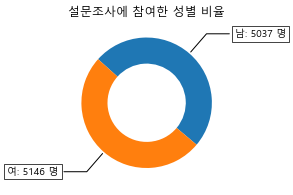

In [18]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = []
gender = []
for g, c in gender_count.items():
    data.append(c)
    gender.append(g)

gender_strs = []
for d, g in zip(data, gender):
    gender_kr = '남' if g == 'M' else '여'
    gender_str = gender_kr + ": " + str(d) + " 명"
    gender_strs.append(gender_str)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(gender_strs[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("설문조사에 참여한 성별 비율")

plt.show()

In [19]:
age_count = rspt_m_df.groupby('RSPT_AGGRP_CD')['RSPT_AGGRP_CD'].value_counts()
age_count = age_count.to_dict()
age_id2count = {idx[0]: count for idx, count in age_count.items()}

In [20]:
aggrp_c = './KFS002501/TB_KFS_FFNSR_AGGRP_C.csv'
aggrp_c_df = pd.read_csv(aggrp_c, encoding='cp949', header=1)
aggrp_c_df

,AGGRP_CD,AGGRP_NM
0,1,19~29세
1,2,30~39세
2,3,40~49세
3,4,50~59세
4,5,60~69세
5,6,70세 이상


In [21]:
age_id2desc = {idx: desc for idx, desc in aggrp_c_df.values}

In [22]:
age_dist = []
for idx, count in age_id2count.items():
    desc = str(count) + " " + age_id2desc[idx]
    age_dist.append(desc)
print(age_dist)

['1761 19~29세', '1673 30~39세', '1978 40~49세', '2033 50~59세', '1476 60~69세', '1262 70세 이상']


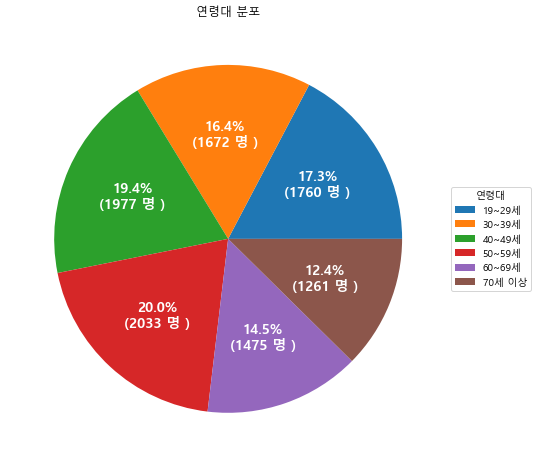

In [23]:
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

data = [float(x.split()[0]) for x in age_dist]
age_range = [' '.join(x.split()[1:]) for x in age_dist]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} 명 )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, age_range,
          title="연령대",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("연령대 분포")

plt.show()

In [24]:
area_count = rspt_m_df.groupby('RSPT_RSDNC_ARCD')['RSPT_RSDNC_ARCD'].value_counts()
area_count = area_count.to_dict()
area_id2count = {idx[0]: count for idx, count in area_count.items()}
print(area_id2count)

{1: 1744, 2: 650, 3: 672, 4: 504, 5: 294, 6: 344, 7: 345, 8: 2068, 9: 350, 10: 366, 11: 446, 12: 156, 13: 544, 14: 664, 15: 412, 16: 420, 17: 204}


In [25]:
area_idx = []
area_count = []
for key, value in area_id2count.items():
    area_idx.append(key)
    area_count.append(value)

In [26]:
ar_c = './KFS002501/TB_KFS_FFNSR_AR_C.csv'
ar_c_df = pd.read_csv(ar_c, encoding='cp949', header=1)
ar_c_df.head()

,RSDNC_ARCD,RSDNC_ARA_NM
0,1,서울특별시
1,2,인천광역시
2,3,부산광역시
3,4,대구광역시
4,5,울산광역시


In [27]:
area_id2name = {idx: name for idx, name in ar_c_df.values}

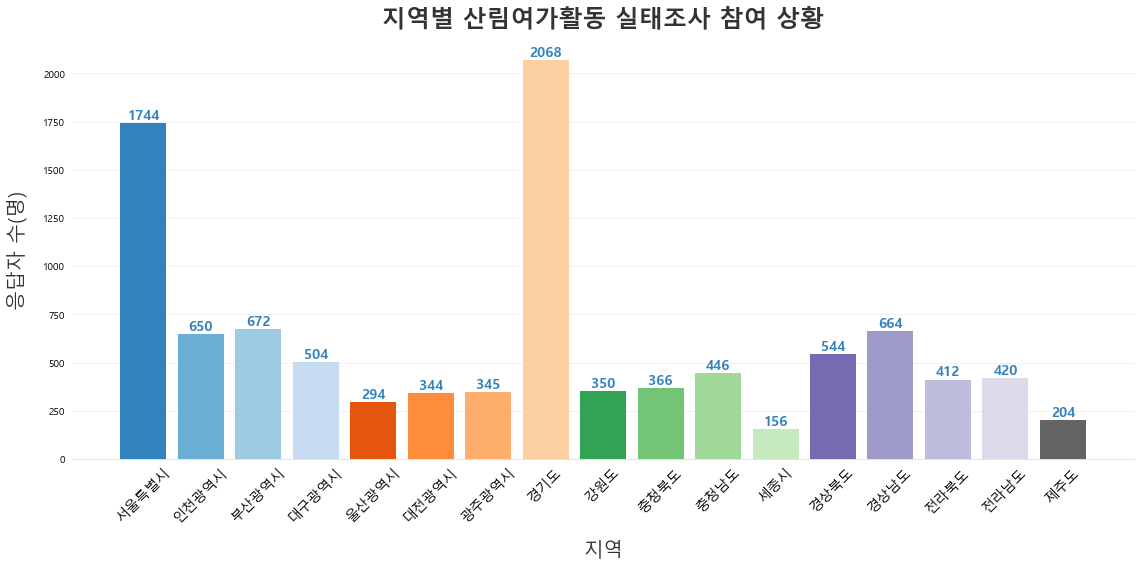

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))

c = [cm.tab20c(x) for x in range(len(area_idx))]

bars = ax.bar(x=range(len(area_idx)),
      height=area_count,
      tick_label=[area_id2name[idx] for idx in area_idx],
    color=c)
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()

for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 20,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold',
        size=14
  )
    
ax.set_xlabel('지역', labelpad=15, color='#333333', size=20)
ax.set_ylabel('응답자 수(명)', labelpad=15, color='#333333', size=20)
ax.set_title('지역별 산림여가활동 실태조사 참여 상황', pad=15, color='#333333', weight='bold', size=24)

fig.tight_layout()

In [29]:
rspt_m = './KFS002501/TB_KFS_FFNSR_RSPT_M.csv'
rspt_m_df = pd.read_csv(rspt_m, encoding='cp949', header=1)
rspt_m_df.head()

,FFNSR_RSPT_CONNO,RSPT_SXDST_CD,RSPT_AGGRP_CD,RSPT_RSDNC_ARCD
0,126,F,2,6
1,128,M,2,6
2,129,M,1,6
3,130,F,5,3
4,131,M,5,6


In [30]:
area_gender_count = rspt_m_df.groupby(['RSPT_RSDNC_ARCD', 'RSPT_SXDST_CD'])['RSPT_RSDNC_ARCD'].value_counts()
area_gender_count = area_gender_count.to_dict()

In [31]:
men = list(range(1, 18))
women = list(range(1, 18))
labels_id = list(range(1, len(men)+1))
for key, value in area_gender_count.items():
    g = key[1]
    if g == 'F':
        women[key[0]-1] = value
    if g == 'M':
        men[key[0]-1] = value

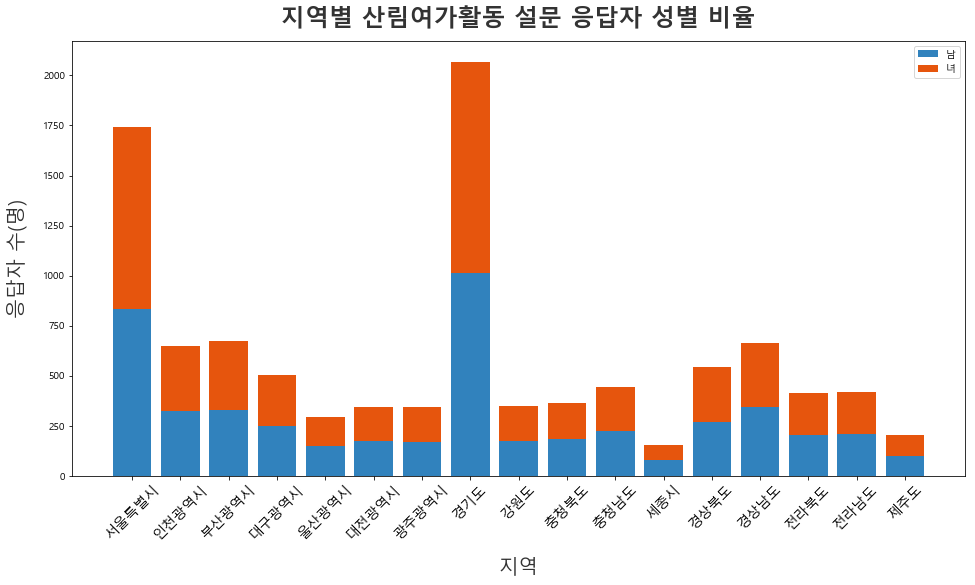

In [32]:
fig, ax = plt.subplots(figsize=(16, 8))

labels = [area_id2name[idx] for idx in labels_id]

ax.bar(labels, men, label='남', color=c[0])
ax.bar(labels, women, label='녀', bottom=men, color=c[4])

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')

ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize=14)
ax.legend()

ax.set_xlabel('지역', labelpad=15, color='#333333', size=20)
ax.set_ylabel('응답자 수(명)', labelpad=15, color='#333333', size=20)
ax.set_title('지역별 산림여가활동 설문 응답자 성별 비율', pad=15, color='#333333', weight='bold', size=24)

plt.show()

In [33]:
area_gender_count = rspt_m_df.groupby(['RSPT_RSDNC_ARCD', 'RSPT_AGGRP_CD'])['RSPT_RSDNC_ARCD'].value_counts()
area_gender_count = area_gender_count.to_dict()

In [34]:
age_range = []
for key, value in area_gender_count.items():
    if key[1] == 1:
        age_range.append((key, value))
        
age_range.sort(key=lambda x: x[0][0])

In [35]:
age_ranges = []
for i in range(1, 7):
    age_range = []
    for key, value in area_gender_count.items():
        if key[1] == i:
            age_range.append((key, value))
    age_range.sort(key=lambda x: x[0][0])
    age_ranges.append(age_range)

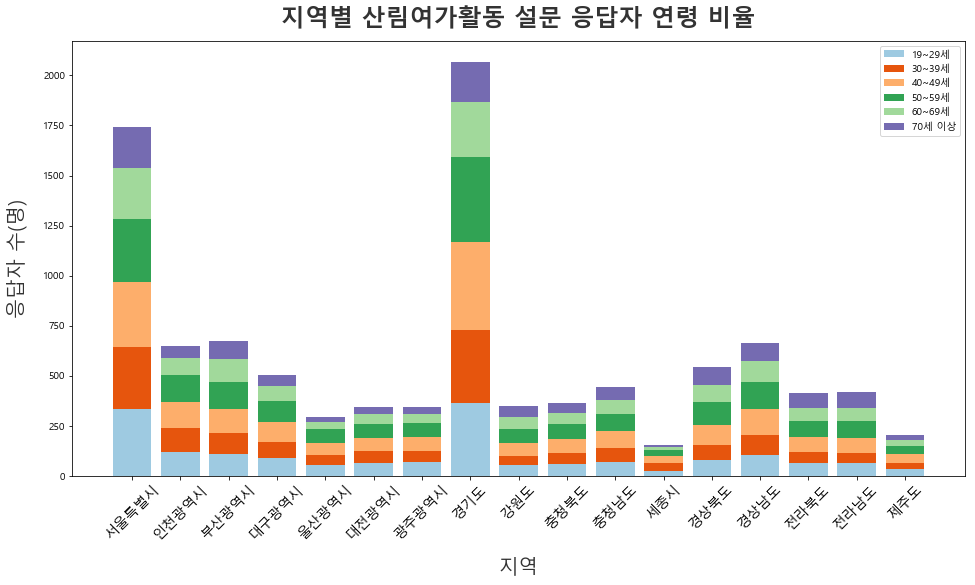

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))

bottom_data = np.zeros(17)
c = [cm.tab20c(x) for x in range(len(age_ranges)*3)]
for age_range in age_ranges:
    data = np.array([item[1] for item in age_range])
    labels_id = [item[0][0] for item in age_range]
    labels = [area_id2name[idx] for idx in labels_id]
    
    ax.bar(labels, data, label=age_id2desc[age_range[0][0][1]], color=c[age_range[0][0][1]*2], bottom=bottom_data)
    bottom_data += data

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')

ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.set_tick_params(labelsize=14)
ax.legend()

ax.set_xlabel('지역', labelpad=15, color='#333333', size=20)
ax.set_ylabel('응답자 수(명)', labelpad=15, color='#333333', size=20)
ax.set_title('지역별 산림여가활동 설문 응답자 연령 비율', pad=15, color='#333333', weight='bold', size=24)

plt.show()

In [37]:
rspt_dst_d = './KFS002501/TB_KFS_FFNSR_RSPT_DST_D.csv'
rspt_dst_d_df = pd.read_csv(rspt_dst_d, encoding='cp949', header=1)
rspt_dst_d_df.head()

,ANSRITM_CD,QSITM_NO_CD,ANSRITM_DSCRT
0,1,Q1-1,거의 매일
1,2,Q1-1,주 3~4회
2,3,Q1-1,주 1~2회
3,4,Q1-1,월 1~2회
4,5,Q1-1,연 3~4회


In [38]:
def answer_code_to_script(df, q_code, a_code):
    temp_df = df[df['QSITM_NO_CD'] == q_code]
    temp_df = temp_df[temp_df['ANSRITM_CD'] == a_code]
    return temp_df['ANSRITM_DSCRT'].tolist()[0]

In [39]:
rspt_qst_c = './KFS002501/TB_KFS_FFNSR_RSPT_QST_C.csv'
rspt_qst_c_df = pd.read_csv(rspt_qst_c, encoding='cp949', header=1)
rspt_qst_c_df.head()

,QSITM_NO_CD,QSITM_DSCRT
0,Q1-1,"귀하는 평소 집이나 직장 근처의 삼림(공원, 녹지, 도시숲 등)을 '일상적인' 산책..."
1,Q1-1-1,"지난 1년 간 산림(공원, 녹지, 도시숲 등)을 방문하지 않은 이유는 무엇입니까? ..."
2,Q1-2,귀하의 댁에서 평소 자주 방문하는 산림(숲)까지 이동할 때 가장 많이 이용하는 교통...
3,Q1-3,귀하의 댁에서 평소 자주 방문하시는 산림(숲)까지 이동할 때 이동하는 데 걸리는 시...
4,Q1-4,귀하께서는 평소에 산이나 숲을 방문하셔서 어떤 활동을 하십니까? 해당하는 활동을 모...


In [40]:
def question_code_to_script(df, q_code):
    temp_df = df[df['QSITM_NO_CD'] == q_code]
    return temp_df['QSITM_DSCRT'].tolist()[0]

In [41]:
def generate_answer_data(df, question_id):
    Q_df =  df[df['문항번호코드'].map(lambda x : x==question_id)]
    Q_df.reset_index(inplace=True, drop=True)
    
    Q_ans_count = Q_df.groupby('답항코드')['답항코드'].value_counts().to_dict()
    Q_ans2count = {idx[0]: count for idx, count in Q_ans_count.items()}
    
    return Q_ans2count

In [42]:
def generate_count_answer_pair(id2count, question_id):
    data, answers = [], []
    for key, value in id2count.items():
        data.append(value)
        answers.append(answer_code_to_script(rspt_dst_d_df, question_id, key))
        
    return data, answers

In [43]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%({:d} 명 )".format(pct, absolute)

In [44]:
def plot_answer_pi(question, answers, data):
    fig, ax = plt.subplots(figsize=(14, 7), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w", size="smaller"))

    ax.legend(wedges, answers,
              title="답항",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1),
             fontsize=12)

    plt.setp(autotexts, size=8, weight="bold")
    for text in autotexts:
        s = text.get_text()
        s = float(s.split('%')[0])
        font_size = 8 if s < 1 else 14
        text.set_fontsize(font_size)

    ax.set_title(question, size=14)
    fig.tight_layout()
    plt.show()

In [45]:
question_codes = rspt_qst_c_df['QSITM_NO_CD'].tolist()
question_codes.remove('Q1-1-1')

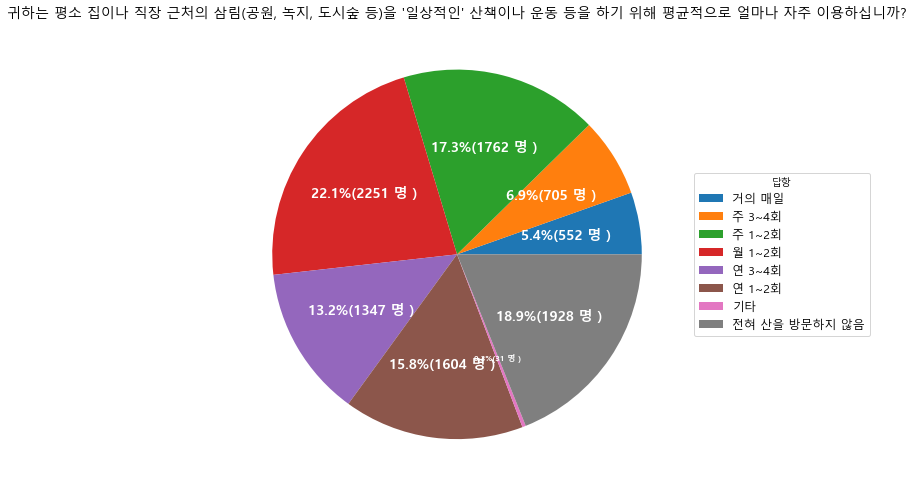

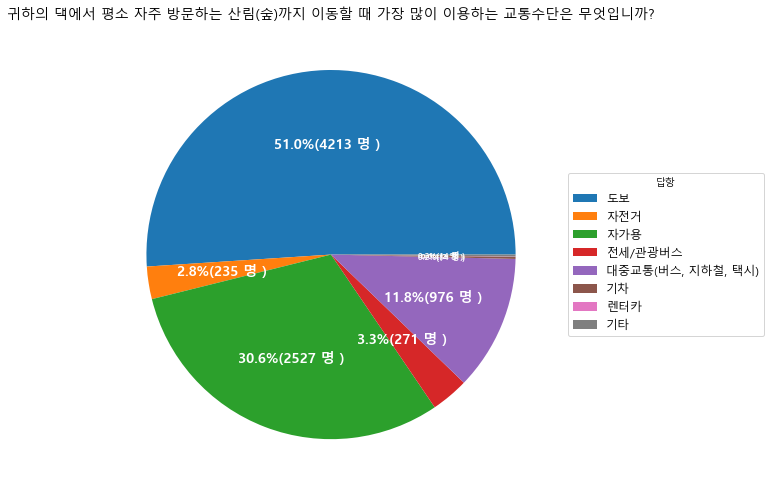

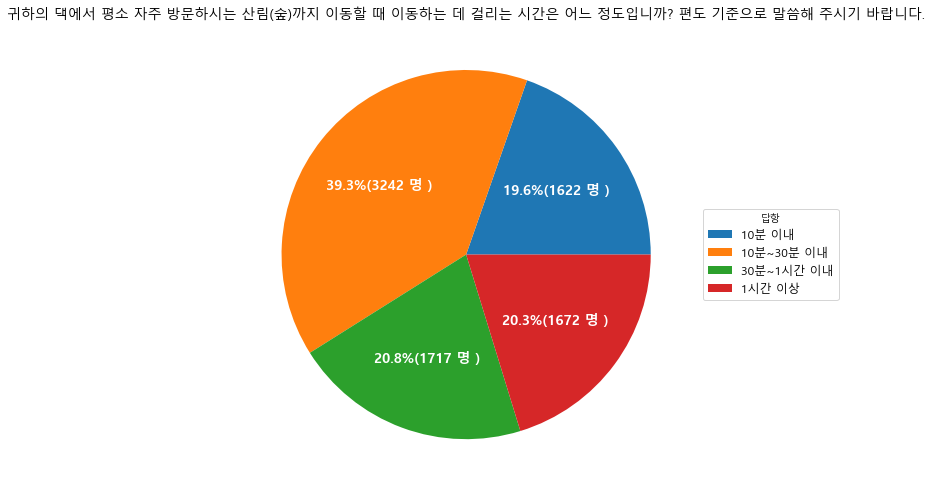

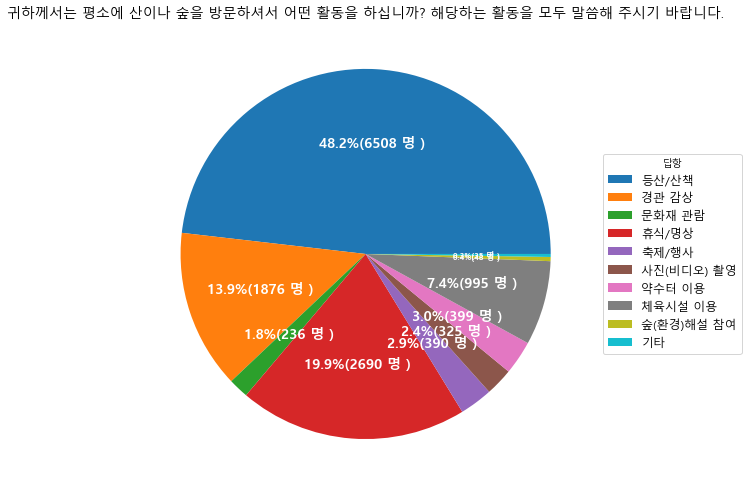

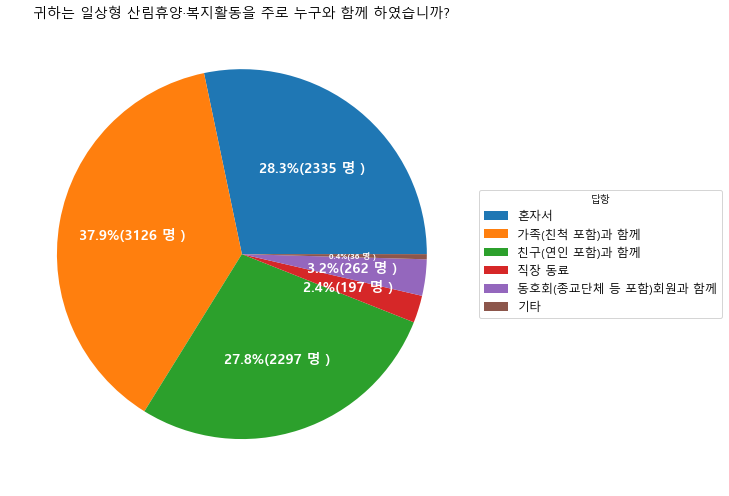

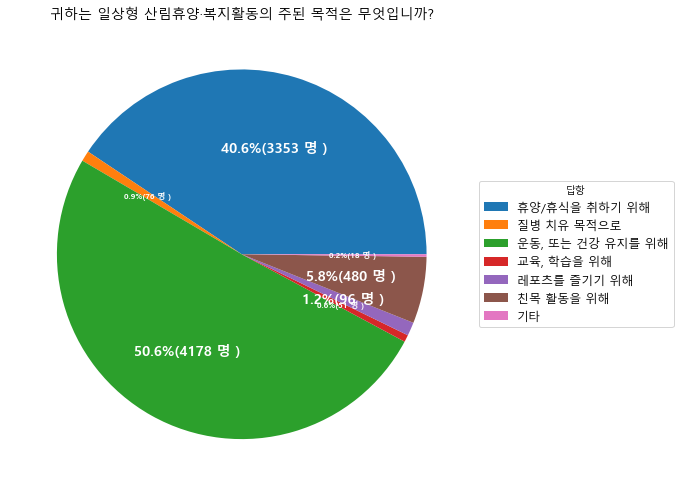

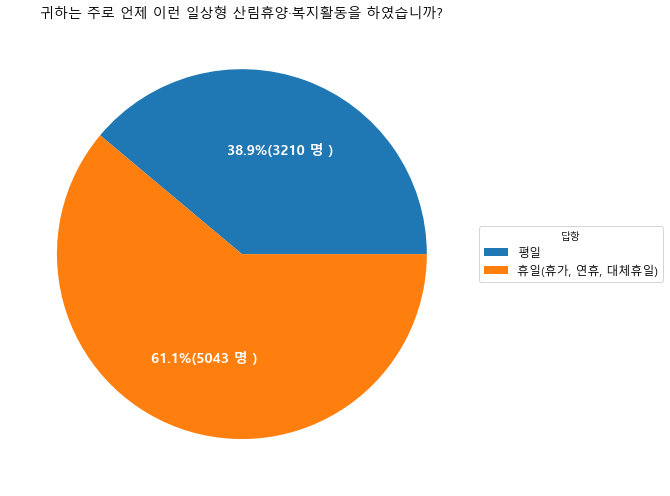

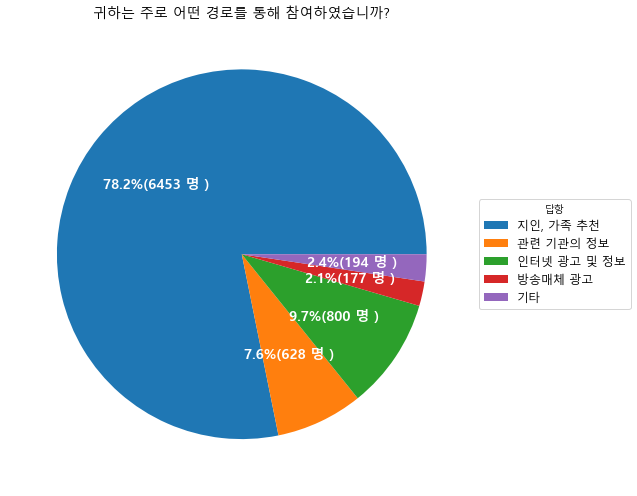

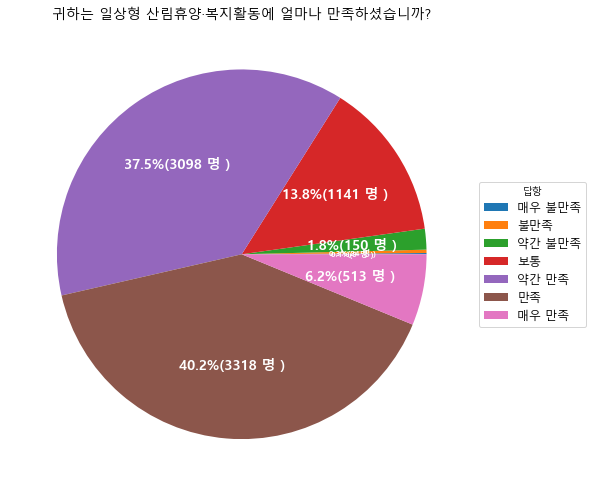

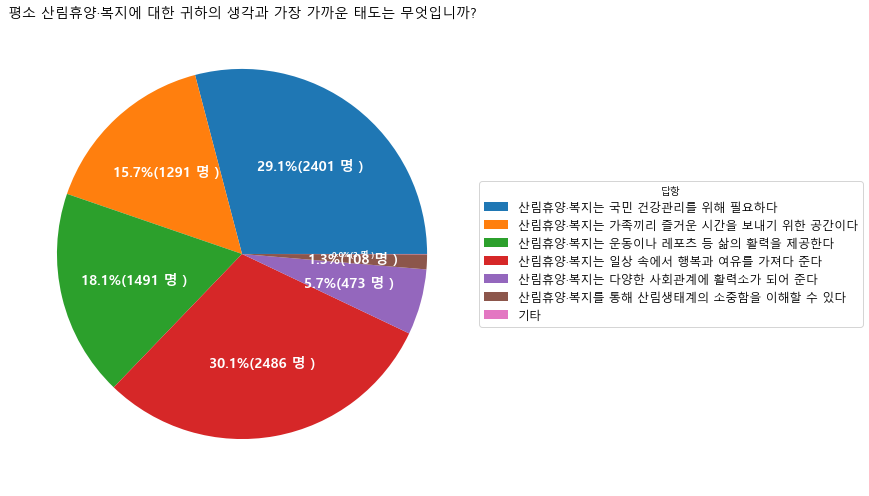

In [46]:
for code in question_codes:
    Q = generate_answer_data(ans_df.copy(), code)
    data, answers = generate_count_answer_pair(Q, code)
    question = question_code_to_script(rspt_qst_c_df.copy(), code)
    
    plot_answer_pi(question, answers, data)

In [47]:
Q3_df = ans_df.copy()
Q3_df = Q3_df[Q3_df['문항번호코드']=='Q1-3']
Q3_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명
2,126,Q1-3,4,NaN
12,128,Q1-3,2,NaN
22,129,Q1-3,4,NaN
32,130,Q1-3,4,NaN
43,131,Q1-3,3,NaN


In [48]:
def get_answer_by_code(q_id, a_id):
    temp_df = rspt_dst_d_df[rspt_dst_d_df['QSITM_NO_CD'] == q_id]
    temp_df = temp_df[temp_df['ANSRITM_CD'] == a_id]
    return temp_df['ANSRITM_DSCRT'].tolist()[0]

In [49]:
def get_age_code_by_id(pid):
    return rspt_m_df[rspt_m_df['FFNSR_RSPT_CONNO'] == pid]['RSPT_AGGRP_CD'].tolist()[0]

In [50]:
age_codes = []
for pid in Q3_df['실태조사응답자일련번호'].tolist():
    age_code = get_age_code_by_id(pid)
    age_codes.append(age_code)

In [51]:
Q3_df['age_c'] = age_codes

In [52]:
Q3_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명,age_c
2,126,Q1-3,4,NaN,2
12,128,Q1-3,2,NaN,2
22,129,Q1-3,4,NaN,1
32,130,Q1-3,4,NaN,5
43,131,Q1-3,3,NaN,5


In [53]:
Q3_age_dict = Q3_df.groupby(['답항코드', 'age_c'])['실태조사응답자일련번호'].count().to_dict()
results = {key[0]: list(range(6)) for key, value in Q3_age_dict.items()}

In [54]:
category_names = []
for key, value in Q3_age_dict.items():
    results[key[0]][key[1]-1] = value
    category_names.append(age_id2desc[key[1]])

In [55]:
result2 = {}
for key, value in results.items():
    result2[get_answer_by_code('Q1-3', key)] = value
print(result2)

{'10분~30분 이내': [496, 506, 676, 662, 508, 395], '30분~1시간 이내': [278, 302, 331, 379, 250, 178], '10분 이내': [267, 250, 304, 300, 256, 245], '1시간 이상': [265, 278, 334, 397, 254, 144]}


In [56]:
def survey(results, category_names, q_id):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.yaxis.set_tick_params(labelsize=12)
    question_str = question_code_to_script(rspt_qst_c_df.copy(), q_id)
    q_length = int(len(question_str)/2)
    question_str = question_str[:q_length] + '\n' + question_str[q_length:]
    
    ax.set_title(question_str, fontsize=14)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=6, bbox_to_anchor=(0.5, -0.01),
              loc='upper center', fontsize='12')

    return fig, ax

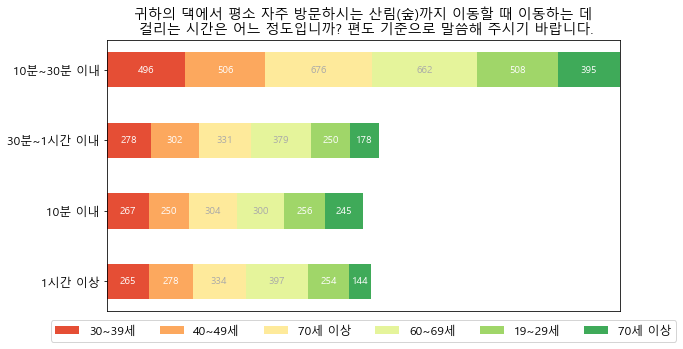

In [57]:
survey(result2, category_names, "Q1-3")
plt.show()

In [58]:
Q1_df = ans_df.copy()
Q1_df = Q1_df[Q1_df['문항번호코드']=='Q1-1']
Q1_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명
0,126,Q1-1,4,NaN
10,128,Q1-1,5,NaN
20,129,Q1-1,5,NaN
30,130,Q1-1,3,NaN
41,131,Q1-1,5,NaN


In [59]:
age_codes = []
for pid in Q1_df['실태조사응답자일련번호'].tolist():
    age_code = get_age_code_by_id(pid)
    age_codes.append(age_code)

In [60]:
Q1_df['age_c'] = age_codes

In [61]:
Q1_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명,age_c
0,126,Q1-1,4,NaN,2
10,128,Q1-1,5,NaN,2
20,129,Q1-1,5,NaN,1
30,130,Q1-1,3,NaN,5
41,131,Q1-1,5,NaN,5


In [62]:
Q1_age_dict = Q1_df.groupby(['답항코드', 'age_c'])['실태조사응답자일련번호'].count().to_dict()
results = {key[0]: list(range(6)) for key, value in Q1_age_dict.items()}

In [63]:
category_names = []
for key, value in Q1_age_dict.items():
    results[key[0]][key[1]-1] = value
    category_names.append(age_id2desc[key[1]])

In [64]:
result2 = {}
for key, value in results.items():
    result2[get_answer_by_code('Q1-1', key)] = value

In [65]:
print(result2)

{'거의 매일': [44, 40, 67, 100, 137, 164], '주 1~2회': [226, 297, 328, 388, 287, 237], '전혀 산을 방문하지 않음': [455, 337, 333, 295, 208, 300], '주 3~4회': [82, 75, 95, 133, 172, 148], '연 3~4회': [259, 246, 321, 277, 166, 78], '연 1~2회': [355, 303, 317, 299, 181, 150], '월 1~2회': [334, 373, 508, 531, 323, 183], '기타': [6, 2, 9, 10, 2, 2]}


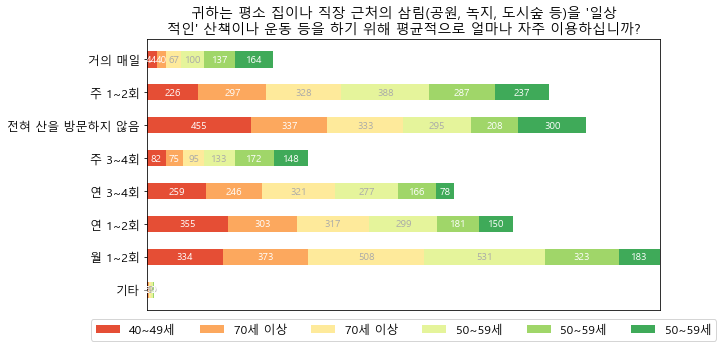

In [66]:
survey(result2, category_names, 'Q1-1')
plt.show()

In [67]:
Q7_df = ans_df.copy()
Q7_df = Q7_df[Q7_df['문항번호코드']=='Q1-7']
Q7_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명
6,126,Q1-7,2,NaN
16,128,Q1-7,2,NaN
26,129,Q1-7,2,NaN
37,130,Q1-7,2,NaN
48,131,Q1-7,2,NaN


In [68]:
age_codes = []
for pid in Q7_df['실태조사응답자일련번호'].tolist():
    age_code = get_age_code_by_id(pid)
    age_codes.append(age_code)

In [69]:
Q7_df['age_c'] = age_codes

In [70]:
Q7_df.head()

,실태조사응답자일련번호,문항번호코드,답항코드,답항추가설명,age_c
6,126,Q1-7,2,NaN,2
16,128,Q1-7,2,NaN,2
26,129,Q1-7,2,NaN,1
37,130,Q1-7,2,NaN,5
48,131,Q1-7,2,NaN,5


In [71]:
Q7_age_dict = Q7_df.groupby(['답항코드', 'age_c'])['실태조사응답자일련번호'].count().to_dict()
results = {key[0]: list(range(6)) for key, value in Q7_age_dict.items()}
print(results)

{1: [0, 1, 2, 3, 4, 5], 2: [0, 1, 2, 3, 4, 5]}


In [72]:
category_names = []
for key, value in Q7_age_dict.items():
    results[key[0]][key[1]-1] = value
    category_names.append(age_id2desc[key[1]])

In [73]:
result2 = {}
for key, value in results.items():
    result2[get_answer_by_code('Q1-7', key)] = value
print(result2)

{'휴일(휴가, 연휴, 대체휴일)': [971, 979, 1139, 1072, 590, 293], '평일': [335, 357, 506, 666, 678, 669]}


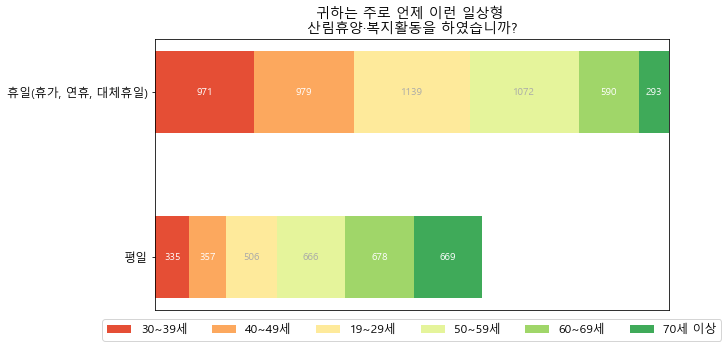

In [74]:
survey(result2, category_names, 'Q1-7')
plt.show()